# Population Data from CSV

This notebooks reads sample population data from `data/atlantis.csv` and plots it using Matplotlib. Edit `data/atlantis.csv` and re-run this cell to see how the plots change!

In [3]:
import matplotlib.pyplot as plt
import pandas

df = pandas.read_csv('../data/grain_size_dist.csv')
df


,kornstørrelse_mm,vægt_g
0,8.000,0.00
1,4.000,0.00
2,2.000,0.11
3,1.000,0.22
4,0.500,0.36
5,0.250,0.70
6,0.125,13.47
7,0.063,108.30
8,0.031,149.94


## Use the pandas documentation to use the .cumsum() method to calculate the cumulative sum

In [4]:
df['cum_vægt_g'] = df[' vægt_g'].cumsum()
df

,kornstørrelse_mm,vægt_g,cum_vægt_g
0,8.000,0.00,0.00
1,4.000,0.00,0.00
2,2.000,0.11,0.11
3,1.000,0.22,0.33
4,0.500,0.36,0.69
5,0.250,0.70,1.39
6,0.125,13.47,14.86
7,0.063,108.30,123.16
8,0.031,149.94,273.10


In [5]:
df['cumfrac_vægt_frac'] = 1- (df[' vægt_g'].cumsum() / df[' vægt_g'].sum())
df['cumfrac_vægt_%'] = df['cumfrac_vægt_frac'] *100
df

,kornstørrelse_mm,vægt_g,cum_vægt_g,cumfrac_vægt_frac,cumfrac_vægt_%
0,8.000,0.00,0.00,1.000000,100.000000
1,4.000,0.00,0.00,1.000000,100.000000
2,2.000,0.11,0.11,0.999597,99.959722
3,1.000,0.22,0.33,0.998792,99.879165
4,0.500,0.36,0.69,0.997473,99.747345
5,0.250,0.70,1.39,0.994910,99.491029
6,0.125,13.47,14.86,0.945588,94.558770
7,0.063,108.30,123.16,0.549030,54.902966
8,0.031,149.94,273.10,0.000000,0.000000


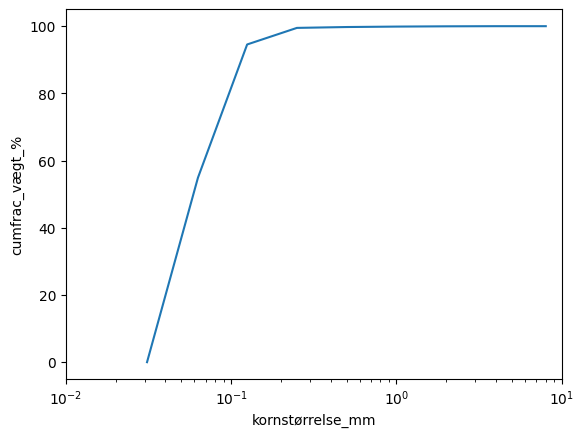

In [6]:
x = df['kornstørrelse_mm']
y = df['cumfrac_vægt_%']

plt.plot(x,y)
# plt.title("Population of Atlantis")
plt.xlabel('kornstørrelse_mm')
plt.ylabel('cumfrac_vægt_%')
plt.xscale('log')

plt.xlim(0.01, 10)


plt.show()

In [7]:
# add size classification for grain sizes


In [8]:
p10 = df['kornstørrelse_mm'].quantile(0.1)
p60 = df['kornstørrelse_mm'].quantile(0.6)

print(f"Tenth percentile: {p10}")
print(f"Sixtieth percentile: {p60}")

Tenth percentile: 0.056600000000000004
Sixtieth percentile: 0.8999999999999999


In [9]:
uniformity = p60 / p10
print(f"Uniformity: {uniformity}")

Uniformity: 15.901060070671376


<Axes: >

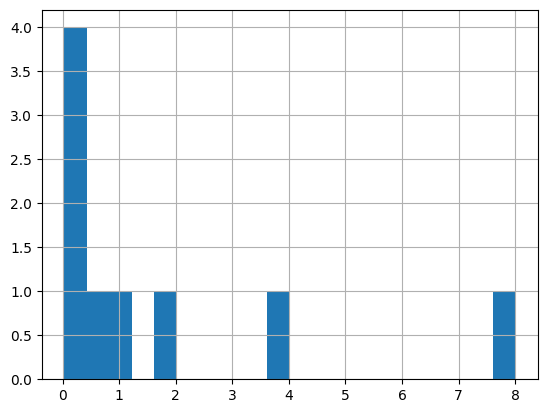

In [10]:
df['kornstørrelse_mm'].hist(bins=20)

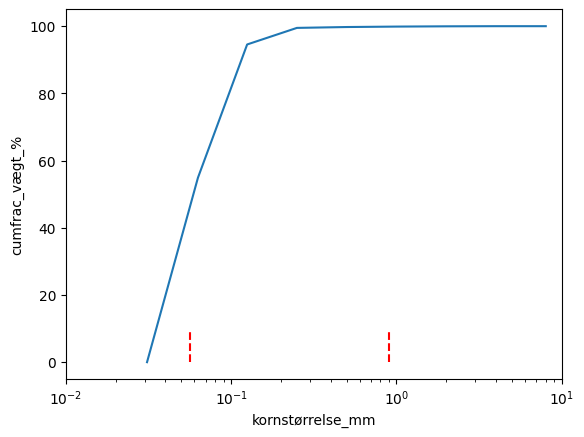

In [11]:
x = df['kornstørrelse_mm']
y = df['cumfrac_vægt_%']

plt.plot(x,y)
plt.xlabel('kornstørrelse_mm')
plt.ylabel('cumfrac_vægt_%')
plt.xscale('log')

plt.vlines(p10, 0, 10, colors='r', linestyles='dashed')
plt.vlines(p60, 0, 10, colors='r', linestyles='dashed')

plt.xlim(0.01, 10)


plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

In [13]:
interp1d(df['kornstørrelse_mm'], df['cumfrac_vægt_%'], kind='linear')